In [1]:
#check for data files
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', '911.csv', 'ProjectONE.ipynb']


In [3]:
# import all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# usage of inline plotting
%matplotlib inline

In [5]:
# load data from csv file
dataFrame=pd.read_csv('./911.csv')

In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [7]:
#check head for our dataframe
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:
# top5 zip codes
dataFrame['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [15]:
# top6 twp reaching 911
dataFrame['twp'].value_counts().head(6)


LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
POTTSTOWN       12039
Name: twp, dtype: int64

In [17]:
dataFrame['title'].nunique()


131

In [25]:
# top5 specific reasons to call 911
dataFrame['specificReason']=dataFrame['title'].apply(lambda title:title.split(':')[0])

In [26]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specificReason,SpecificReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


In [27]:
dataFrame['SpecificReason'].value_counts().head(10)

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
 FALL VICTIM              14584
 CARDIAC EMERGENCY        14491
 ROAD OBSTRUCTION -        8767
 SUBJECT IN PAIN           8151
 HEAD INJURY               7613
Name: SpecificReason, dtype: int64

In [32]:
dataFrame['specificReason'].value_counts().head()

EMS        144362
Traffic    101889
Fire        42989
Name: specificReason, dtype: int64

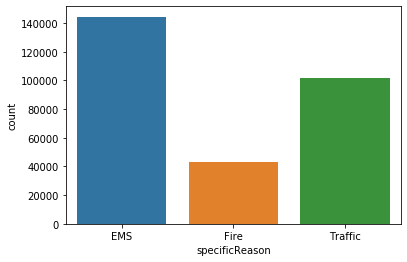

In [49]:
# plot count plot for specificreason
sns.countplot(x='specificReason',data=dataFrame)

In [35]:
dataFrame['specificReason1']=dataFrame['SpecificReason'].apply(lambda reason:reason.strip('-')[0])

In [41]:
dataFrame.drop(['SpecificReason', 'specificReason1'], axis=1,inplace=True)

In [42]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specificReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [50]:
#convert timestamp from object to actual time stamp
dataFrame['timeStamp']=pd.to_datetime(dataFrame['timeStamp'])

In [46]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 10 columns):
lat               289240 non-null float64
lng               289240 non-null float64
desc              289240 non-null object
zip               253942 non-null float64
title             289240 non-null object
timeStamp         289240 non-null datetime64[ns]
twp               289137 non-null object
addr              289240 non-null object
e                 289240 non-null int64
specificReason    289240 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 22.1+ MB


In [47]:
type(dataFrame['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
dataFrame['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [60]:
# create 3 columns for hour ,Months and day of week
dataFrame['Hour']=dataFrame['timeStamp'].apply(lambda time:time.hour)
dataFrame['Month']=dataFrame['timeStamp'].apply(lambda time:time.month)
dataFrame['Day']=dataFrame['timeStamp'].apply(lambda time:time.dayofweek)

In [61]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specificReason,hours,months,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,16,12,3


In [64]:
dataFrame.drop(['hours','months'],axis=1,inplace=True)


In [67]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specificReason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [68]:
dataFrame['Day'].nunique()

7

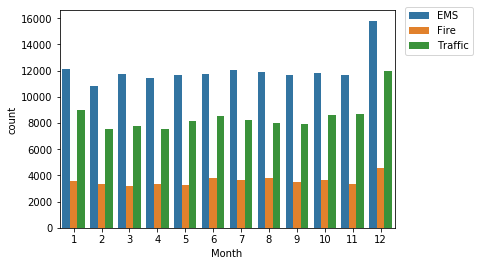

In [77]:
# plot a graph for month
sns.countplot(x='Month',data=dataFrame,hue='specificReason')
plt.legend(loc='upper right',bbox_to_anchor=(1.25,1.04))

In [82]:
# use group_by 
byMonth=dataFrame.groupby('Day').count()

In [83]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specificReason,Hour,Month
Day,,,,,,,,,,,,
0,42092,42092,42092,37030,42092,42092,42081,42092,42092,42092,42092,42092
1,43744,43744,43744,38385,43744,43744,43731,43744,43744,43744,43744,43744
2,43442,43442,43442,38327,43442,43442,43422,43442,43442,43442,43442,43442
3,42784,42784,42784,37616,42784,42784,42770,42784,42784,42784,42784,42784
4,44468,44468,44468,38923,44468,44468,44450,44468,44468,44468,44468,44468


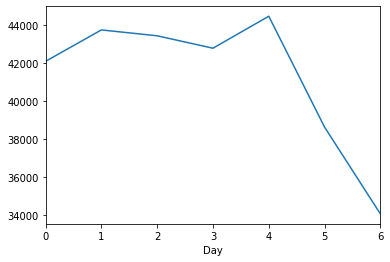

In [84]:
byMonth['twp'].plot()